In [1]:
pip install monai==1.2.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -q "monai-weekly[nibabel]"

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -q matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch

from monai.transforms import (
    EnsureChannelFirstd,
    LoadImage,
    LoadImaged,
    Orientationd,
    Rand3DElasticd,
    RandAffined,
    Spacingd,
)
from monai.transforms import LoadImage, LoadImaged, Resized, Compose, SaveImage
from monai.config import print_config
from monai.apps import download_and_extract
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import tempfile
import shutil
import os
from glob import glob

print_config()

MONAI version: 1.2.0
Numpy version: 1.24.2
Pytorch version: 2.2.2+cpu
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: c33f1ba588ee00229a309000e888f9817b4f1934
MONAI __file__: c:\Users\phucl\AppData\Local\Programs\Python\Python311\Lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: 5.3.0
Nibabel version: 5.2.1
scikit-image version: 0.22.0
Pillow version: 10.2.0
Tensorboard version: 2.16.2
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: NOT INSTALLED or UNKNOWN VERSION.
tqdm version: 4.66.2
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.8
pandas version: 1.5.3
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please vis

In [21]:
data_dir = 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/'

train_images = sorted(glob(os.path.join(data_dir, 'TrainData', '*.nii.gz')))
train_labels = sorted(glob(os.path.join(data_dir, 'TrainLabel', '*.nii.gz')))

val_images = sorted(glob(os.path.join(data_dir, 'ValidData', '*.nii.gz')))
val_labels = sorted(glob(os.path.join(data_dir, 'ValidLabel', '*.nii.gz')))

train_files = [{"image": image_name, 'label': label_name} for image_name, label_name in zip(train_images, train_labels)]
val_files = [{"image": image_name, 'label': label_name} for image_name, label_name in zip(val_images, val_labels)]

In [6]:
train_files[0]

{'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400064682.nii.gz',
 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400064682-label.nii.gz'}

In [7]:
train_files

[{'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400064682.nii.gz',
  'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400064682-label.nii.gz'},
 {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400069812.nii.gz',
  'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400069812-label.nii.gz'},
 {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400071848.nii.gz',
  'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400071848-la

--Begin Now

In [8]:
loader = LoadImage(dtype=np.float32, image_only=True)
for file in train_files:
    image = loader(file["image"])
    # print(f"input: {train_data_dicts[0]['image']}")
    print(f"image shape: {image.shape}")
    print(f"image affine:\n{image.meta['affine']}")
    print(f"image pixdim:\n{image.pixdim}")

    label = loader(file["label"])
    # print(f"input: {train_data_dicts[0]['image']}")
    print(f"label shape: {label.shape}")
    print(f"label affine:\n{label.meta['affine']}")
    print(f"label pixdim:\n{label.pixdim}")


image shape: torch.Size([256, 256, 128])
image affine:
tensor([[ -0.9766,   0.0000,   0.0000, 125.0000],
        [  0.0000,  -0.9766,   0.0000, 111.2000],
        [  0.0000,   0.0000,   1.2500, -55.6250],
        [  0.0000,   0.0000,   0.0000,   1.0000]], dtype=torch.float64)
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
label shape: torch.Size([512, 512, 128])
label affine:
tensor([[ -0.4883,   0.0000,   0.0000, 125.0000],
        [  0.0000,  -0.4883,   0.0000, 111.2000],
        [  0.0000,   0.0000,   1.2500, -55.6250],
        [  0.0000,   0.0000,   0.0000,   1.0000]], dtype=torch.float64)
label pixdim:
tensor([0.4883, 0.4883, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
image affine:
tensor([[ -0.9766,   0.0000,   0.0000, 112.9000],
        [  0.0000,  -0.9766,   0.0000, 123.6000],
        [  0.0000,   0.0000,   1.2500, -55.6250],
        [  0.0000,   0.0000,   0.0000,   1.0000]], dtype=torch.float64)
image pixdim:
tensor([0.9766, 0.9

In [9]:
#   Vì như dictionary : có thêm field label nên cần thiết sử dụng LoadImaged
loader = LoadImaged(keys=("image", "label"), image_only=False)
for file in train_files:
    data_dict = loader(file)
    # print(f"input:, {train_data_dicts[0]}")
    print(f"image shape: {data_dict['image'].shape}")
    print(f"label shape: {data_dict['label'].shape}")
    print(f"image pixdim:\n{data_dict['image'].pixdim}")

image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tens

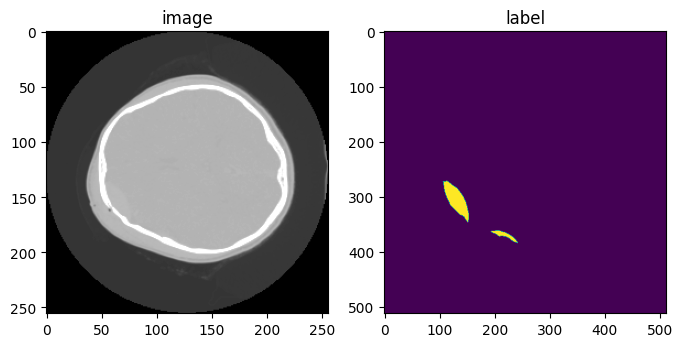

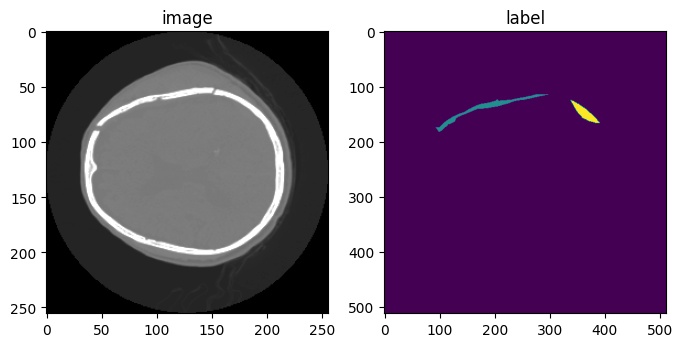

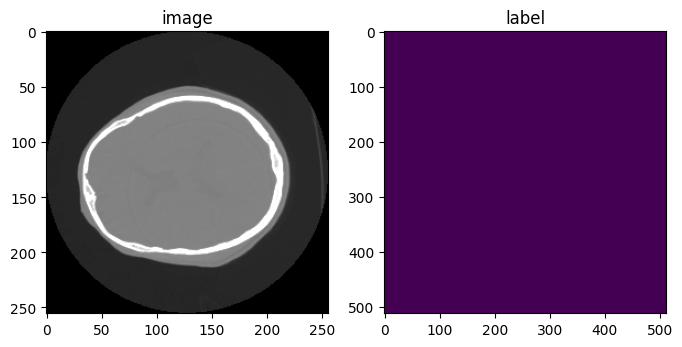

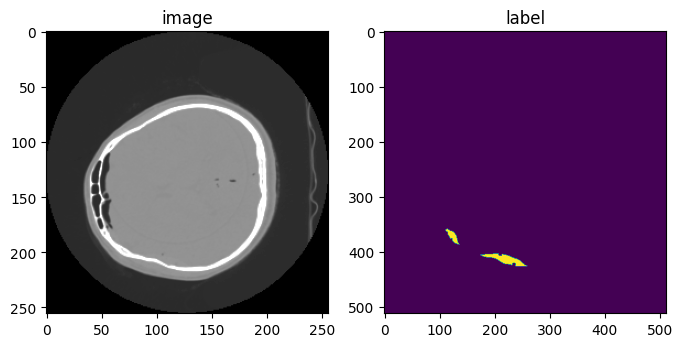

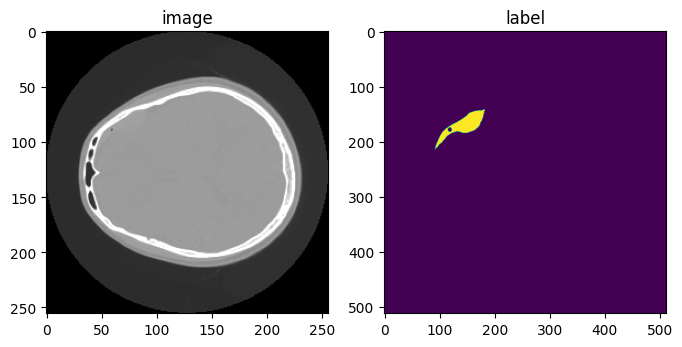

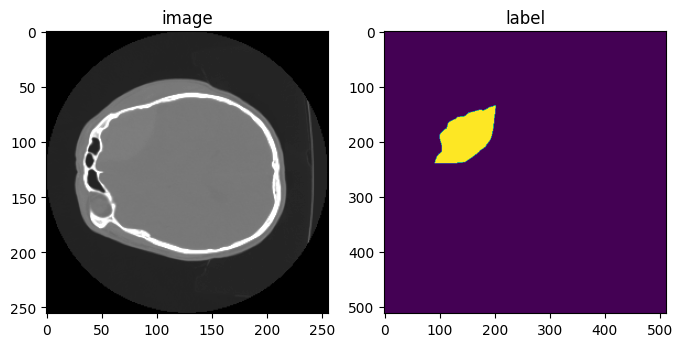

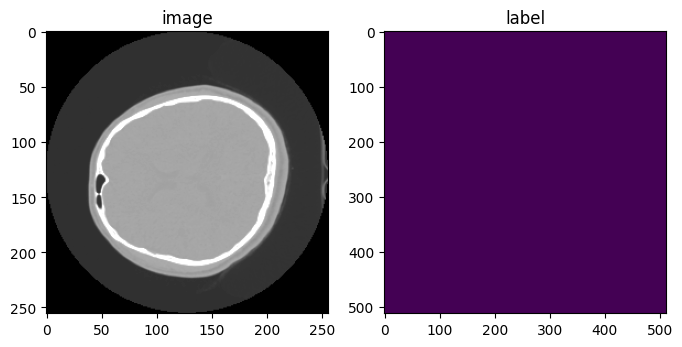

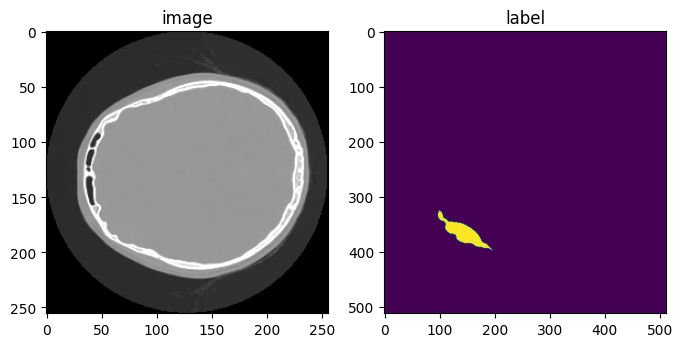

In [10]:
for file in train_files:
    data_dict = loader(file)
    image, label = data_dict["image"], data_dict["label"]
    plt.figure("visualize", (8, 4))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image[:, :, 70], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("label")
    plt.imshow(label[:, :, 70])
    plt.show()

In [11]:
#Cập nhật kích thước kênh theo giả định chuyển đổi của thư viện MONAI
ensure_channel_first = EnsureChannelFirstd(keys=["image", "label"])
for file in train_files:
    data_dict = loader(file)
    datac_dict = ensure_channel_first(data_dict)
    print(f"image shape: {datac_dict['image'].shape}")
    print(f"label shape: {datac_dict['label'].shape}")


image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])


Stage Spatial Transforms

In [12]:
#Định hướng trục ban đầu
orientation = Orientationd(keys=["image", "label"], axcodes="RAS")

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -137.8233],
        [   0.0000,    0.0000,    1.2500,  -55.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -138.3116],
        [   0.0000,    0.0000,    1.2500,  -55.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


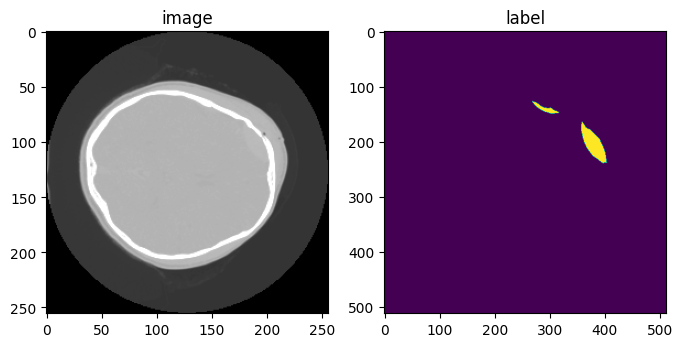

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -136.1233],
        [   0.0000,    0.9766,    0.0000, -125.4233],
        [   0.0000,    0.0000,    1.2500,  -55.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -136.6116],
        [   0.0000,    0.4883,    0.0000, -125.9116],
        [   0.0000,    0.0000,    1.2500,  -55.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


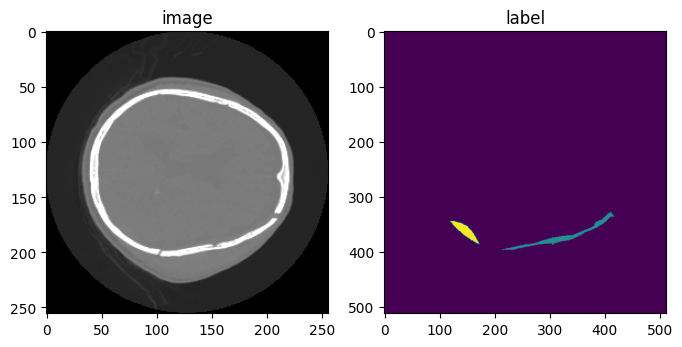

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -107.1233],
        [   0.0000,    0.9766,    0.0000, -112.9233],
        [   0.0000,    0.0000,    1.2500,  -48.3750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -107.6116],
        [   0.0000,    0.4883,    0.0000, -113.4116],
        [   0.0000,    0.0000,    1.2500,  -48.3750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


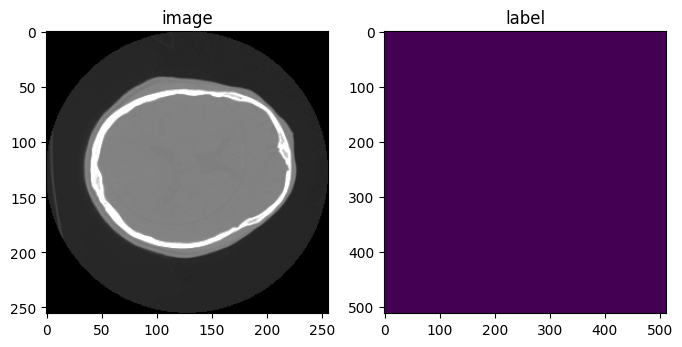

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -133.6233],
        [   0.0000,    0.0000,    1.2500,  -64.8750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -134.1116],
        [   0.0000,    0.0000,    1.2500,  -64.8750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


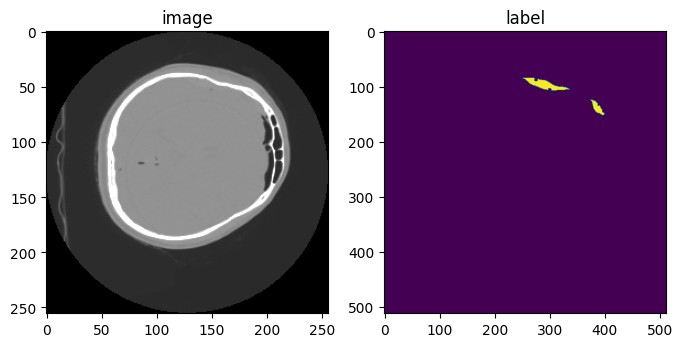

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -142.9233],
        [   0.0000,    0.0000,    1.2500,  -64.8750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -143.4116],
        [   0.0000,    0.0000,    1.2500,  -64.8750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


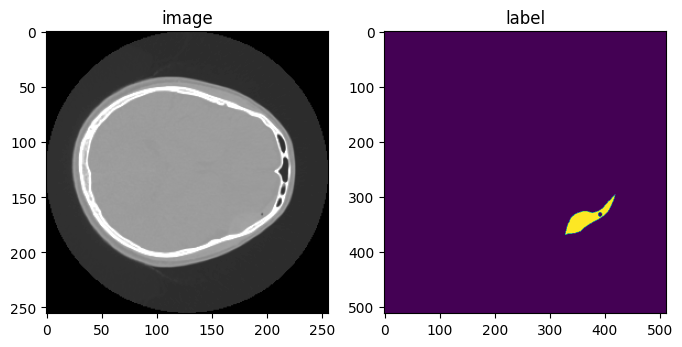

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -134.2383],
        [   0.0000,    0.0000,    1.2500, -169.5380],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -134.7266],
        [   0.0000,    0.0000,    1.2500, -169.5380],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


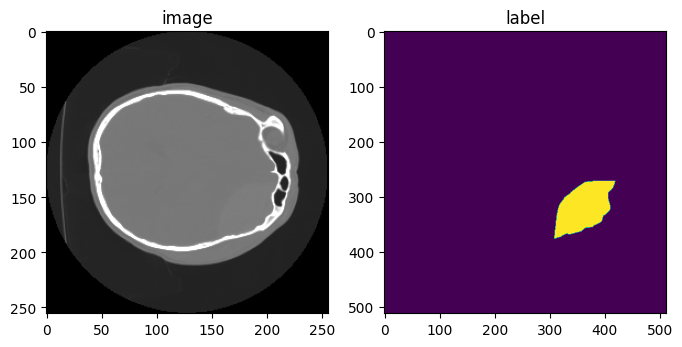

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -115.0233],
        [   0.0000,    0.0000,    1.2500,  -73.1250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -115.5116],
        [   0.0000,    0.0000,    1.2500,  -73.1250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


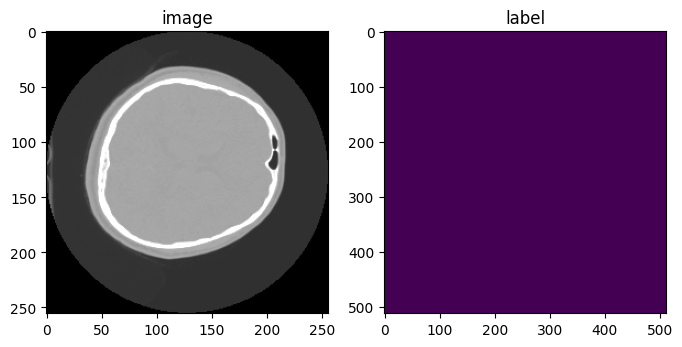

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.8750,    0.0000,    0.0000, -111.1250],
        [   0.0000,    0.8750,    0.0000, -122.3820],
        [   0.0000,    0.0000,    1.2500, -171.6210],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4375,    0.0000,    0.0000, -111.5625],
        [   0.0000,    0.4375,    0.0000, -122.8195],
        [   0.0000,    0.0000,    1.2500, -171.6210],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


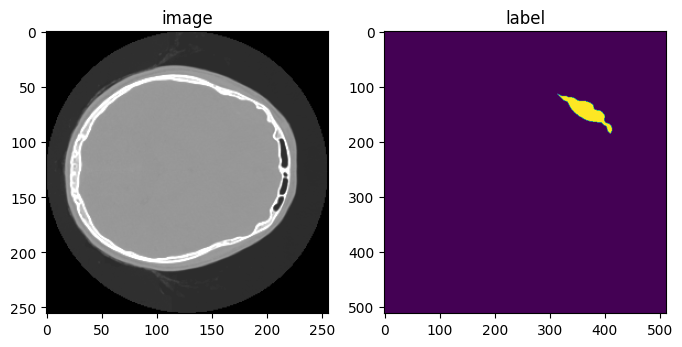

In [13]:
for file in train_files:
    data_dict = loader(file)
    datac_dict_channeld = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict_channeld)
    print(f"image shape: {data_dict_orient['image'].shape}")
    print(f"label shape: {data_dict_orient['label'].shape}")
    print(f"image affine after Orientation:\n{data_dict_orient['image'].meta['affine']}")
    print(f"label affine after Orientation:\n{data_dict_orient['label'].meta['affine']}")

    image, label = data_dict_orient["image"], data_dict_orient["label"]
    plt.figure("visualise", (8, 4))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image[0, :, :, 70], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("label")
    plt.imshow(label[0, :, :, 70])
    plt.show()

In [14]:
#Voxel check
for file in train_files:
    data_dict = loader(file)
    datac_dict = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict)
    print(f'[sample {file}]')
    print(f"image shape: {data_dict_orient['image'].shape}")
    print(f"label unique: {torch.unique(data_dict_orient['label'])}")
    print(f"image pixdim: {data_dict_orient['image'].pixdim}")
    print(f"label pixdim: {data_dict_orient['label'].pixdim}")

[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400064682.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400064682-label.nii.gz'}]
image shape: torch.Size([1, 256, 256, 128])
label unique: tensor([0., 1.])
image pixdim: tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
label pixdim: tensor([0.4883, 0.4883, 1.2500], dtype=torch.float64)
[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400069812.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400069812-label.nii.gz'}]
image shape: torch.Size([1, 256, 256, 128])
label unique: tensor([0., 1., 2.])
image pixdim: tensor([0.

Hầu hết các khối lượng đầu vào có thể có kích thước voxel không nhất quán.
Bạn có thể chuyển đổi nó thành tọa độ mm (thế giới thực) bằng cách sử dụng affine tồn tại trong tệp NIfTI của từng dữ liệu.
Spacingd của monai  khiến việc này trở nên dễ dàng.

In [15]:
#Voxel optimize to (1,1,1) milimet
spacing = Spacingd(keys=["image", "label"], pixdim=(1., 1., 1.), mode=("bilinear", "nearest"))

for file in train_files:
    data_dict = loader(file)
    datac_dict = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict)
    DataD_voxelOpti = spacing(data_dict_orient)
    print(f'[sample {file}]')
    print(f"image shape: {DataD_voxelOpti['image'].shape}")
    print(f"label unique: {torch.unique(DataD_voxelOpti['label'])}")
    print(f"image pixdim: {DataD_voxelOpti['image'].pixdim}")
    print(f"label pixdim: {DataD_voxelOpti['label'].pixdim}")

[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400064682.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400064682-label.nii.gz'}]
image shape: torch.Size([1, 250, 250, 160])
label unique: tensor([0., 1.])
image pixdim: tensor([1., 1., 1.], dtype=torch.float64)
label pixdim: tensor([1., 1., 1.], dtype=torch.float64)
[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400069812.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400069812-label.nii.gz'}]
image shape: torch.Size([1, 250, 250, 160])
label unique: tensor([0., 1., 2.])
image pixdim: tensor([1., 1., 1.], dtype=torch.f

In [73]:
# trans = Compose([LoadImage(image_only=True), AddChannel(), ToTensor()])
# img = trans(train_files[0]["image"])
# print(type(img), img.shape, img.get_device())

c:\Users\phucl\AppData\Local\Programs\Python\Python311\Lib\site-packages\monai\utils\deprecate_utils.py:111: FutureWarning:

<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. It will be removed in version 1.3. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead with `channel_dim='no_channel'`.



<class 'monai.data.meta_tensor.MetaTensor'> torch.Size([1, 512, 512, 32]) -1


In [16]:
# Hàm thêm hậu tố hỗ trợ lưu file
def add_suffix_to_filename(filename: str, suffix:str) -> str:
  """
  Takes a NIfTI filename and appends a suffix.

  Args:
      filename : NIfTI filename
      suffix : suffix to append

  Returns:
      str : filename after append the suffix
  """
  if filename.endswith('.nii'):
      result = filename.replace('.nii', f'_{suffix}.nii')
      return result
  elif filename.endswith('.nii.gz'):
      result = filename.replace('.nii.gz', f'_{suffix}.nii.gz')
      return result
  else:
      raise RuntimeError('filename with unknown extension')

In [17]:
import torchio as tio
standardize = tio.ZNormalization()

Phép biến đổi affine sau đây được xác định để tạo ra một bản vá hình ảnh (300, 300, 50).

Vị trí bản vá được chọn ngẫu nhiên trong phạm vi (-40, 40), (-40, 40), (-2, 2) theo trục x, y và z tương ứng.

Bản dịch có liên quan đến trung tâm hình ảnh.

Góc quay 3D được chọn ngẫu nhiên từ (-45, 45) độ quanh trục z và 5 độ quanh trục x và y.

Hệ số tỷ lệ ngẫu nhiên được chọn ngẫu nhiên từ (1,0 - 0,15, 1,0 + 0,15) dọc theo mỗi trục.

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[   0.8750,    0.0000,    0.0000, -111.1250],
        [   0.0000,    0.8750,    0.0000, -122.3820],
        [   0.0000,    0.0000,    1.2500, -171.6210],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[   0.4375,    0.0000,    0.0000, -111.5625],
        [   0.0000,    0.4375,    0.0000, -122.8195],
        [   0.0000,    0.0000,    1.2500, -171.6210],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


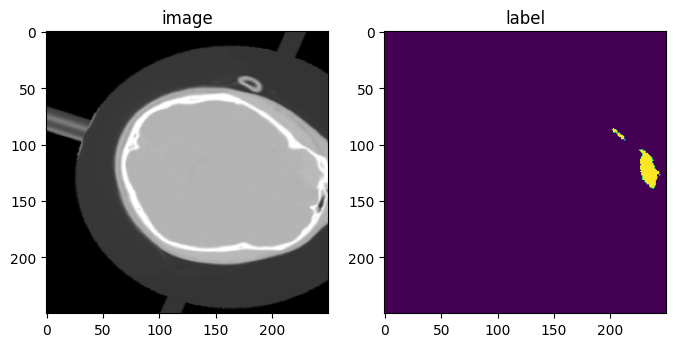

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[ 1.0024e+00, -3.1842e-01, -2.4703e-02, -7.4907e+01],
        [ 3.7767e-01,  8.4650e-01,  1.6988e-02, -2.0178e+02],
        [ 2.0337e-02, -2.4660e-02,  9.0214e-01, -4.6847e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[ 1.0024e+00, -3.1842e-01, -2.4703e-02, -7.5237e+01],
        [ 3.7767e-01,  8.4650e-01,  1.6988e-02, -2.0238e+02],
        [ 2.0337e-02, -2.4660e-02,  9.0214e-01, -4.6845e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)


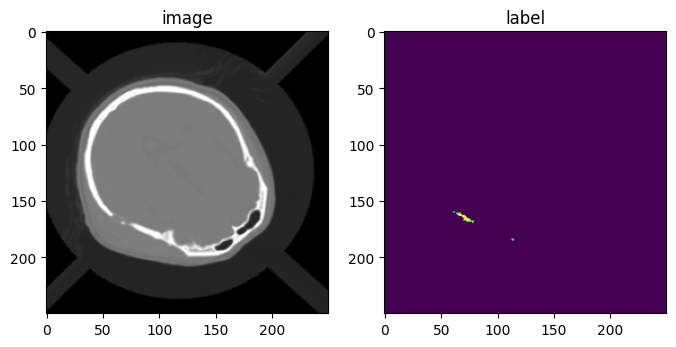

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[ 7.9374e-01, -7.1224e-01, -3.0011e-03, -2.6639e+01],
        [ 7.5791e-01,  7.4452e-01,  4.4128e-02, -1.8395e+02],
        [-3.0678e-02, -3.4558e-02,  1.0126e+00, -5.0364e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[ 7.9374e-01, -7.1224e-01, -3.0011e-03, -2.6668e+01],
        [ 7.5791e-01,  7.4452e-01,  4.4128e-02, -1.8469e+02],
        [-3.0678e-02, -3.4558e-02,  1.0126e+00, -5.0331e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)


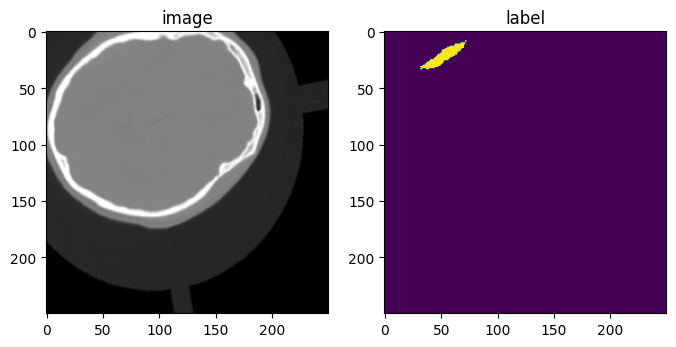

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[ 8.4994e-01,  1.6338e-01,  9.2016e-03, -7.1282e+01],
        [-1.4944e-01,  9.2668e-01, -3.2474e-02, -6.1572e+01],
        [-1.3081e-02,  2.9508e-02,  9.6887e-01, -4.8174e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[ 8.4994e-01,  1.6338e-01,  9.2016e-03, -7.1777e+01],
        [-1.4944e-01,  9.2668e-01, -3.2474e-02, -6.1949e+01],
        [-1.3081e-02,  2.9508e-02,  9.6887e-01, -4.8182e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)


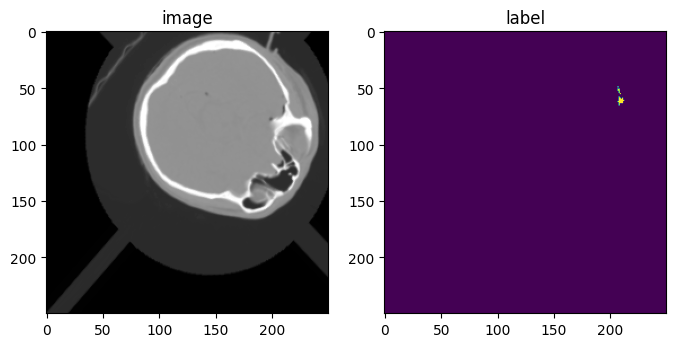

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[ 7.2153e-01, -7.7480e-01, -9.9266e-02,  5.4502e+01],
        [ 6.9797e-01,  8.0699e-01, -4.2873e-03, -1.9049e+02],
        [ 6.5408e-02, -6.4388e-02,  1.1408e+00, -7.3568e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[ 7.2153e-01, -7.7480e-01, -9.9266e-02,  5.4541e+01],
        [ 6.9797e-01,  8.0699e-01, -4.2873e-03, -1.9123e+02],
        [ 6.5408e-02, -6.4388e-02,  1.1408e+00, -7.3568e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)


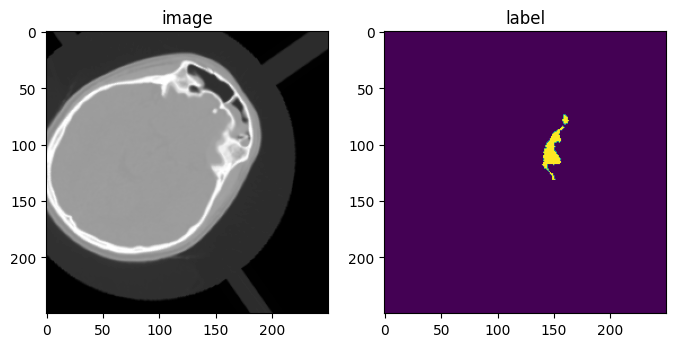

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[ 8.0440e-01,  5.6236e-01,  3.1133e-02, -1.4356e+02],
        [-5.6342e-01,  8.0321e-01,  3.6442e-02, -3.3322e+01],
        [-4.1835e-03, -4.3375e-02,  1.0785e+00, -6.5835e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[ 8.0440e-01,  5.6236e-01,  3.1133e-02, -1.4423e+02],
        [-5.6342e-01,  8.0321e-01,  3.6442e-02, -3.3430e+01],
        [-4.1835e-03, -4.3375e-02,  1.0785e+00, -6.5811e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)


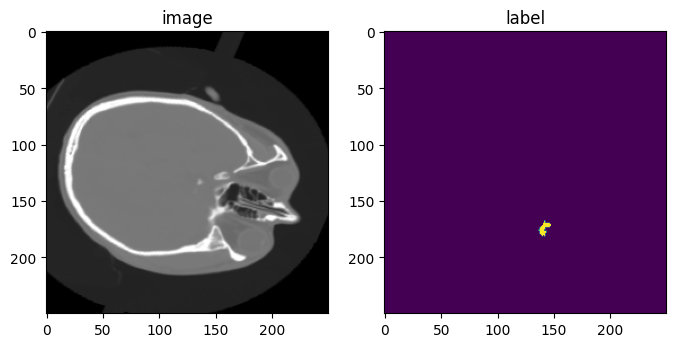

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[ 9.7919e-01, -2.8797e-01, -5.5039e-02, -9.4729e+01],
        [ 3.4834e-01,  8.0999e-01, -1.5375e-02, -1.4325e+02],
        [ 5.5274e-02, -3.1683e-03,  1.0719e+00, -1.8419e+02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[ 9.7919e-01, -2.8797e-01, -5.5039e-02, -9.5062e+01],
        [ 3.4834e-01,  8.0999e-01, -1.5375e-02, -1.4382e+02],
        [ 5.5274e-02, -3.1683e-03,  1.0719e+00, -1.8421e+02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)


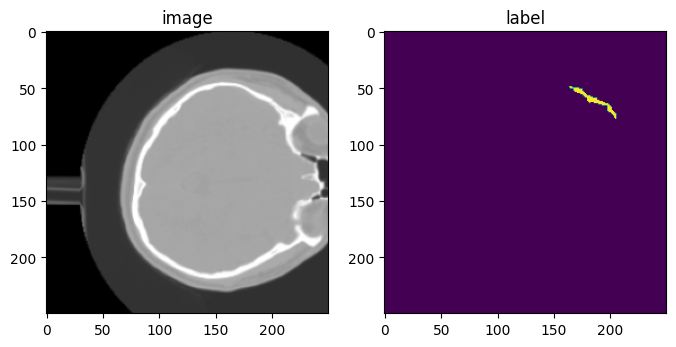

image shape: torch.Size([1, 224, 224, 160])
image affine:
tensor([[ 8.7864e-01, -3.2080e-03, -6.9295e-03, -1.2274e+02],
        [ 3.4485e-03,  9.1912e-01,  7.7851e-02, -1.4783e+02],
        [ 5.3418e-03, -6.5695e-02,  1.0895e+00, -7.1269e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)
label shape: torch.Size([1, 224, 224, 160])
label affine:
tensor([[ 8.7864e-01, -3.2080e-03, -6.9295e-03, -1.2316e+02],
        [ 3.4485e-03,  9.1912e-01,  7.7851e-02, -1.4828e+02],
        [ 5.3418e-03, -6.5695e-02,  1.0895e+00, -7.1239e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)


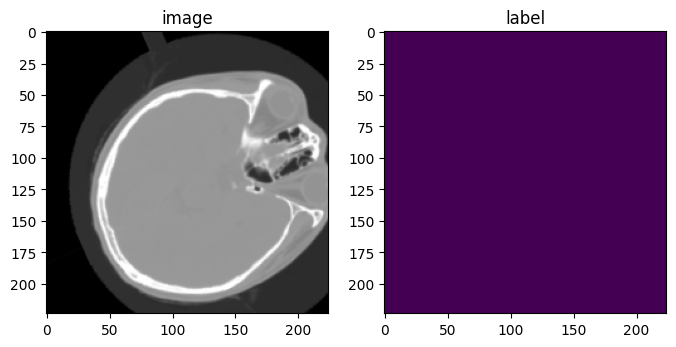

In [18]:
rand_affine = RandAffined(
    keys=["image", "label"],
    mode=("bilinear", "nearest"),
    prob=1.0,
    translate_range=(40, 40, 2),
    rotate_range=(np.pi / 36, np.pi / 36, np.pi / 4),
    scale_range=(0.15, 0.15, 0.15),
    padding_mode="border",
)
rand_affine.set_random_state(seed=123)


for file in train_files:
    data_dict = loader(file)
    datac_dict = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict)
    DataD_voxelOpti = spacing(data_dict_orient)
    
    # Áp dụng chuẩn hóa và phép biến đổi làm chuyển đổi affine
    affined = rand_affine(DataD_voxelOpti)

    print(f"image shape: {affined['image'].shape}")
    print(f"image affine:\n{image.meta['affine']}")

    print(f"label shape: {affined['label'].shape}")
    print(f"label affine:\n{label.meta['affine']}")


    image, label = affined["image"], affined["label"]
    plt.figure("visualise", (8, 4))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image[0, :, :, 70], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("label")
    plt.imshow(label[0, :, :, 70])
    plt.show()

    tensorof_Affinedimg = image.numpy()
    tensorof_Affinedlbl = label.numpy()

    Affinedimg = tensorof_Affinedimg.squeeze(0)
    Affinedlbl = tensorof_Affinedlbl.squeeze(0)

    # Tạo đối tượng NIfTI từ NumPy array
    nifti_image_affined = nib.Nifti1Image(Affinedimg, affine=None)  # Bạn cần cung cấp affine nếu có
    nifti_label_affined = nib.Nifti1Image(Affinedlbl, affine=None)  # Bạn cần cung cấp affine nếu có


    # Lưu đối tượng NIfTI thành một tệp
    basename = os.path.basename(file['image'])
    basename_label = os.path.basename(file['label'])

    out_filename = add_suffix_to_filename(basename, suffix='affine')
    out_filelabelname = add_suffix_to_filename(basename_label, suffix='affine')

    nib.save(nifti_image_affined, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Geometric/TrainSet/Image/{out_filename}')
    nib.save(nifti_label_affined, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Geometric/TrainSet/Label/{out_filelabelname}')

    # break

Sử dụng TORCHIO cho Flip

image shape: torch.Size([1, 250, 250, 160])
label shape: torch.Size([1, 251, 251, 160])


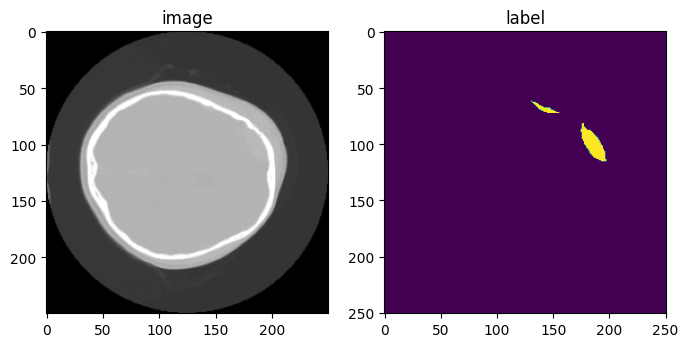

image shape: torch.Size([1, 250, 250, 160])
label shape: torch.Size([1, 251, 251, 160])


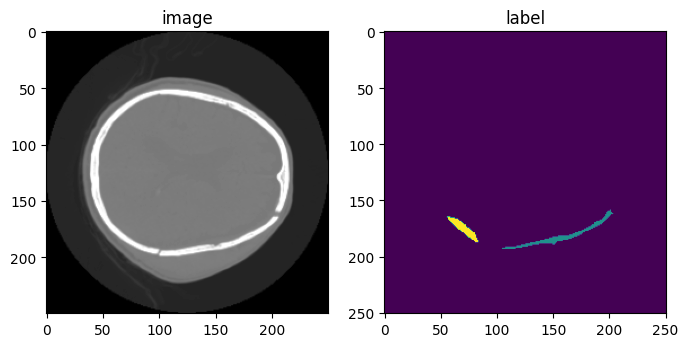

image shape: torch.Size([1, 250, 250, 160])
label shape: torch.Size([1, 251, 251, 160])


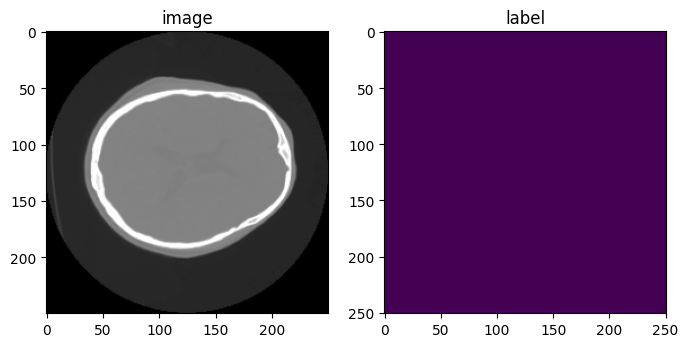

image shape: torch.Size([1, 250, 250, 160])
label shape: torch.Size([1, 251, 251, 160])


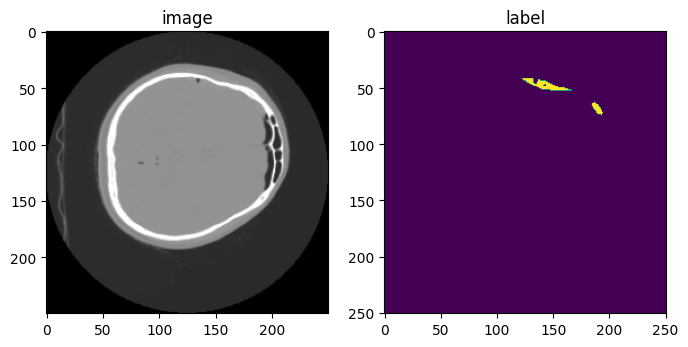

image shape: torch.Size([1, 250, 250, 160])
label shape: torch.Size([1, 251, 251, 160])


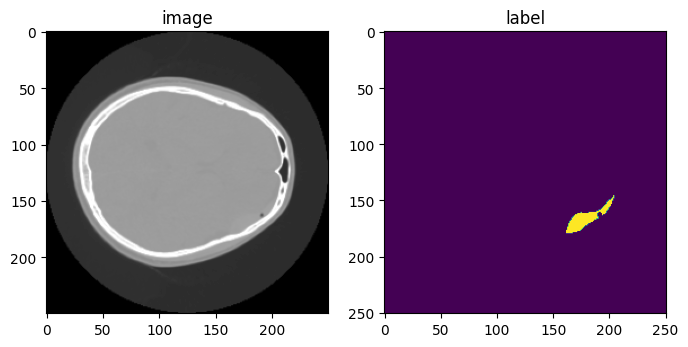

image shape: torch.Size([1, 250, 250, 160])
label shape: torch.Size([1, 251, 251, 160])


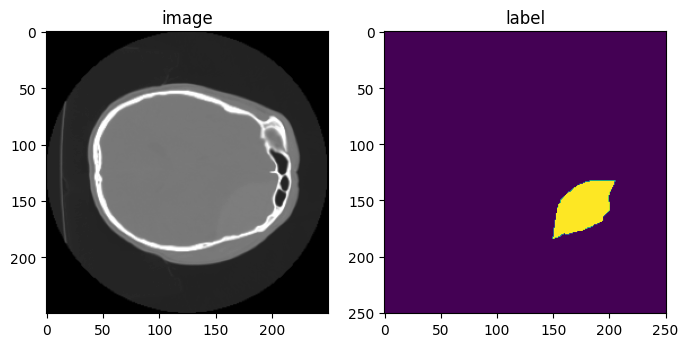

image shape: torch.Size([1, 250, 250, 160])
label shape: torch.Size([1, 251, 251, 160])


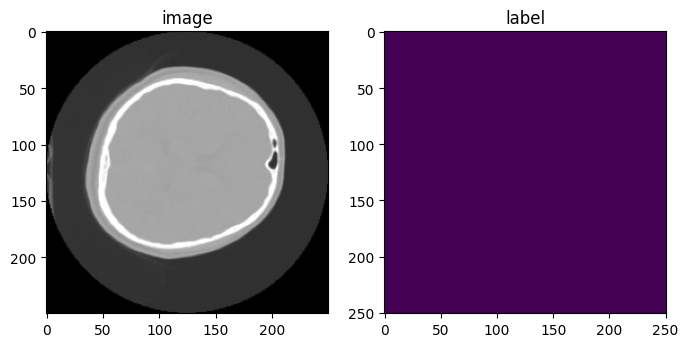

image shape: torch.Size([1, 224, 224, 160])
label shape: torch.Size([1, 225, 225, 160])


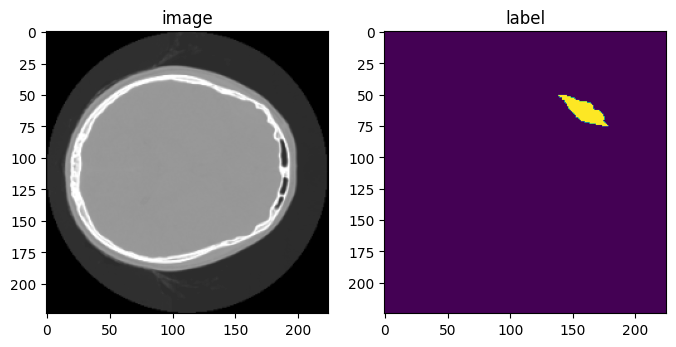

In [20]:
random_flip = tio.RandomFlip(keys=["image", "label"], axes=['inferior-superior'], flip_probability=1)
# Lặp qua từng ảnh trong tập dữ liệu
for file in train_files:
    data_dict = loader(file)
    datac_dict_channeld = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict_channeld)
    DataD_voxelOpti = spacing(data_dict_orient)   
    flipped = random_flip(DataD_voxelOpti)

    print(f"image shape: {flipped['image'].shape}")
    print(f"label shape: {flipped['label'].shape}")

    image, label = flipped["image"], flipped["label"]
    plt.figure("visualise", (8, 4))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image[0, :, :, 70], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("label")
    plt.imshow(label[0, :, :, 70])
    plt.show()

    tensorof_Flippedimg = image.numpy()
    tensorof_Flippedlbl = label.numpy()

    Flippedimg = tensorof_Flippedimg.squeeze(0)
    Flippedlbl = tensorof_Flippedlbl.squeeze(0)

    # Tạo đối tượng NIfTI từ NumPy array
    nifti_image_flipped = nib.Nifti1Image(Flippedimg, affine=None)  # Bạn cần cung cấp affine nếu có
    nifti_label_flipped = nib.Nifti1Image(Flippedlbl, affine=None)  # Bạn cần cung cấp affine nếu có


    # Lưu đối tượng NIfTI thành một tệp
    basename = os.path.basename(file['image'])
    basename_label = os.path.basename(file['label'])

    out_filename = add_suffix_to_filename(basename, suffix='flip')
    out_filelabelname = add_suffix_to_filename(basename_label, suffix='flip')

    nib.save(nifti_image_flipped, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Geometric/TrainSet/Image/{out_filename}')
    nib.save(nifti_label_flipped, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Geometric/TrainSet/Label/{out_filelabelname}')


Random elastic transform

Hình ảnh bản vá (512, 512, 128) được trích xuất ngẫu nhiên từ không gian (+-40, +-40, +-20) bằng tùy chọn  translate_range . 

Nó được dịch từ trung tâm của hình ảnh.

rotate_range xoay ngẫu nhiên (+-5) độ trên trục x và y và (+-45) độ trên trục z.

Chia tỷ lệ ngẫu nhiên được áp dụng ngẫu nhiên +-15% cho mỗi trục

Chạy với elastic vế này, bạn hãy chạy lại từ các bước set up đầu tiên để có được meta gốc! Nếu không sẽ lỗi code không hiểu được meta.

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[ 8.3894e-01,  3.7678e-01,  8.9411e-02, -1.6076e+02],
        [-3.7436e-01,  8.5587e-01,  7.8174e-02, -8.7637e+01],
        [-4.4261e-02, -9.7332e-02,  1.0335e+00, -1.5721e+02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[ 8.3894e-01,  3.7678e-01,  8.9411e-02, -1.6131e+02],
        [-3.7436e-01,  8.5587e-01,  7.8174e-02, -8.7815e+01],
        [-4.4261e-02, -9.7332e-02,  1.0335e+00, -1.5714e+02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)


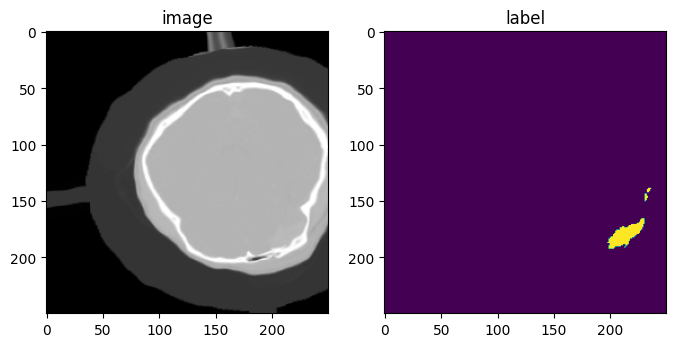

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[   1.0000,    0.0000,    0.0000, -124.0233],
        [   0.0000,    1.0000,    0.0000, -137.8233],
        [   0.0000,    0.0000,    1.0000,  -55.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[   1.0000,    0.0000,    0.0000, -124.5116],
        [   0.0000,    1.0000,    0.0000, -138.3116],
        [   0.0000,    0.0000,    1.0000,  -55.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


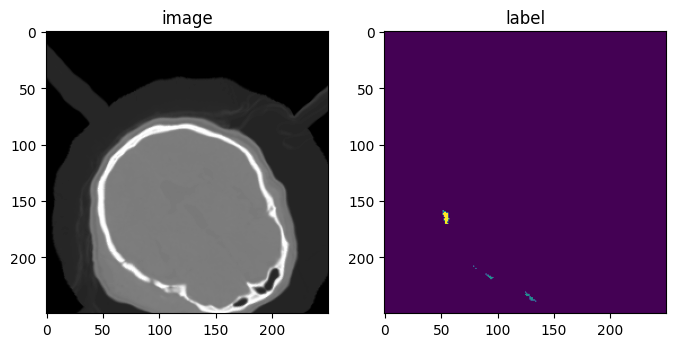

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[   1.0000,    0.0000,    0.0000, -136.1233],
        [   0.0000,    1.0000,    0.0000, -125.4233],
        [   0.0000,    0.0000,    1.0000,  -55.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[   1.0000,    0.0000,    0.0000, -136.6116],
        [   0.0000,    1.0000,    0.0000, -125.9116],
        [   0.0000,    0.0000,    1.0000,  -55.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


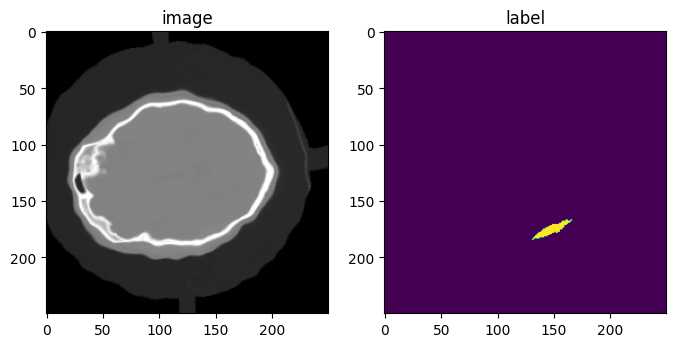

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[   1.0000,    0.0000,    0.0000, -107.1233],
        [   0.0000,    1.0000,    0.0000, -112.9233],
        [   0.0000,    0.0000,    1.0000,  -48.3750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[   1.0000,    0.0000,    0.0000, -107.6116],
        [   0.0000,    1.0000,    0.0000, -113.4116],
        [   0.0000,    0.0000,    1.0000,  -48.3750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


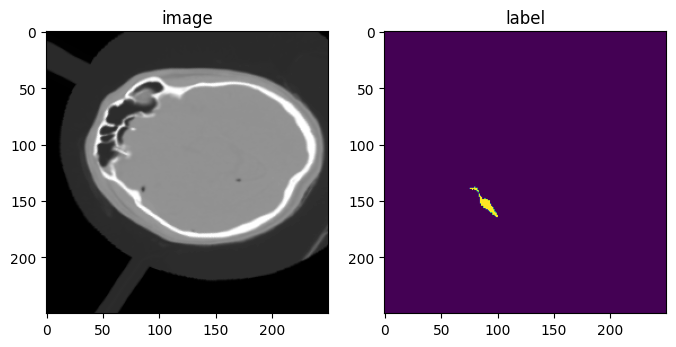

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[   1.0000,    0.0000,    0.0000, -124.0233],
        [   0.0000,    1.0000,    0.0000, -133.6233],
        [   0.0000,    0.0000,    1.0000,  -64.8750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[   1.0000,    0.0000,    0.0000, -124.5116],
        [   0.0000,    1.0000,    0.0000, -134.1116],
        [   0.0000,    0.0000,    1.0000,  -64.8750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


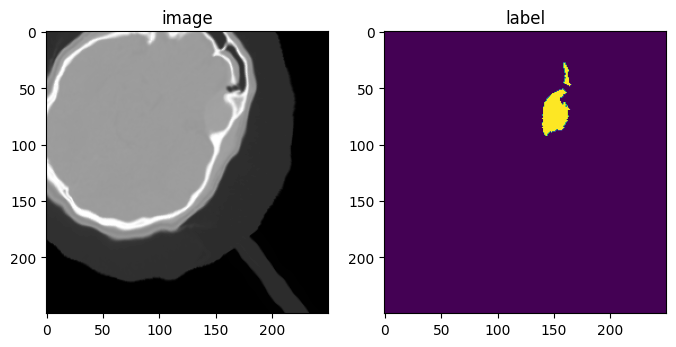

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[   1.0000,    0.0000,    0.0000, -124.0233],
        [   0.0000,    1.0000,    0.0000, -142.9233],
        [   0.0000,    0.0000,    1.0000,  -64.8750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[   1.0000,    0.0000,    0.0000, -124.5116],
        [   0.0000,    1.0000,    0.0000, -143.4116],
        [   0.0000,    0.0000,    1.0000,  -64.8750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


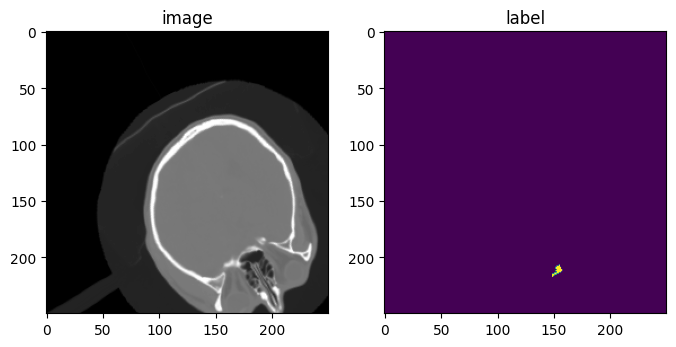

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[   1.0000,    0.0000,    0.0000, -124.0233],
        [   0.0000,    1.0000,    0.0000, -134.2383],
        [   0.0000,    0.0000,    1.0000, -169.5380],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[   1.0000,    0.0000,    0.0000, -124.5116],
        [   0.0000,    1.0000,    0.0000, -134.7266],
        [   0.0000,    0.0000,    1.0000, -169.5380],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


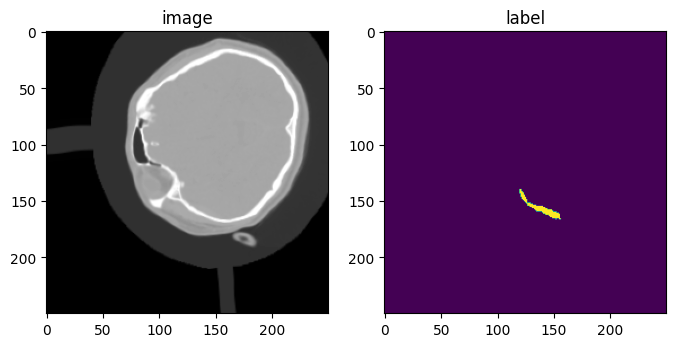

image shape: torch.Size([1, 224, 224, 160])
image affine:
tensor([[   1.0000,    0.0000,    0.0000, -124.0233],
        [   0.0000,    1.0000,    0.0000, -115.0233],
        [   0.0000,    0.0000,    1.0000,  -73.1250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label shape: torch.Size([1, 224, 224, 160])
label affine:
tensor([[   1.0000,    0.0000,    0.0000, -124.5116],
        [   0.0000,    1.0000,    0.0000, -115.5116],
        [   0.0000,    0.0000,    1.0000,  -73.1250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


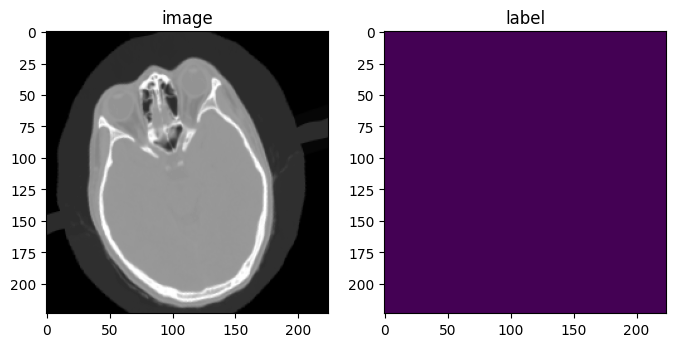

In [19]:
rand_elastic = Rand3DElasticd(
    keys=["image", "label"],
    mode=("bilinear", "nearest"),
    prob=1.0,
    sigma_range=(5, 8),
    magnitude_range=(100, 200),
    translate_range=(50, 50, 2),
    rotate_range=(np.pi / 36, np.pi / 36, np.pi),
    scale_range=(0.15, 0.15, 0.15),
    padding_mode="border",
)
rand_elastic.set_random_state(seed=123)

# Lặp qua từng ảnh trong tập dữ liệu
for file in train_files:
    data_dict = loader(file)
    datac_dict = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict)
    DataD_voxelOpti = spacing(data_dict_orient)
    
    # Áp dụng chuẩn hóa và phép biến đổi làm chuyển đổi elastic
    deformed = rand_elastic(DataD_voxelOpti)

    print(f"image shape: {deformed['image'].shape}")
    print(f"image affine:\n{image.meta['affine']}")

    print(f"label shape: {deformed['label'].shape}")
    print(f"label affine:\n{label.meta['affine']}")


    image, label = deformed["image"], deformed["label"]
    plt.figure("visualise", (8, 4))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image[0, :, :, 70], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("label")
    plt.imshow(label[0, :, :, 70])
    plt.show()

    tensorof_Deformedimg = image.numpy()
    tensorof_Deformedlbl = label.numpy()

    Deformedimg = tensorof_Deformedimg.squeeze(0)
    Deformedlbl = tensorof_Deformedlbl.squeeze(0)

    # Tạo đối tượng NIfTI từ NumPy array
    nifti_image_deformed = nib.Nifti1Image(Deformedimg, affine=None)  # Bạn cần cung cấp affine nếu có
    nifti_label_deformed = nib.Nifti1Image(Deformedlbl, affine=None)  # Bạn cần cung cấp affine nếu có


    # Lưu đối tượng NIfTI thành một tệp
    basename = os.path.basename(file['image'])
    basename_label = os.path.basename(file['label'])

    out_filename = add_suffix_to_filename(basename, suffix='deformed')
    out_filelabelname = add_suffix_to_filename(basename_label, suffix='deformed')

    nib.save(nifti_image_deformed, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Geometric/TrainSet/Image/{out_filename}')
    nib.save(nifti_label_deformed, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Geometric/TrainSet/Label/{out_filelabelname}')

    # break

____________________________________________________________________________________________________________

RUN VALIDATION FILES

In [24]:
val_files

[{'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidData\\2400104001.nii.gz',
  'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel\\2400104001-label.nii.gz'},
 {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidData\\2400106729.nii.gz',
  'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel\\2400106729-label.nii.gz'}]

In [25]:
loader = LoadImage(dtype=np.float32, image_only=True)
for file in val_files:
    image = loader(file["image"])
    # print(f"input: {train_data_dicts[0]['image']}")
    print(f"image shape: {image.shape}")
    print(f"image affine:\n{image.meta['affine']}")
    print(f"image pixdim:\n{image.pixdim}")

    label = loader(file["label"])
    # print(f"input: {train_data_dicts[0]['image']}")
    print(f"label shape: {label.shape}")
    print(f"label affine:\n{label.meta['affine']}")
    print(f"label pixdim:\n{label.pixdim}")


image shape: torch.Size([256, 256, 128])
image affine:
tensor([[ -0.9766,   0.0000,   0.0000, 125.0000],
        [  0.0000,  -0.9766,   0.0000, 131.9000],
        [  0.0000,   0.0000,   1.2207, -46.5000],
        [  0.0000,   0.0000,   0.0000,   1.0000]], dtype=torch.float64)
image pixdim:
tensor([0.9766, 0.9766, 1.2207], dtype=torch.float64)
label shape: torch.Size([512, 512, 125])
label affine:
tensor([[ -0.4883,   0.0000,   0.0000, 125.0000],
        [  0.0000,  -0.4883,   0.0000, 131.9000],
        [  0.0000,   0.0000,   1.2500, -46.5000],
        [  0.0000,   0.0000,   0.0000,   1.0000]], dtype=torch.float64)
label pixdim:
tensor([0.4883, 0.4883, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
image affine:
tensor([[ -0.9766,   0.0000,   0.0000, 125.0000],
        [  0.0000,  -0.9766,   0.0000, 107.1000],
        [  0.0000,   0.0000,   1.2500, -58.6250],
        [  0.0000,   0.0000,   0.0000,   1.0000]], dtype=torch.float64)
image pixdim:
tensor([0.9766, 0.9

In [26]:
#   Vì như dictionary : có thêm field label nên cần thiết sử dụng LoadImaged
loader = LoadImaged(keys=("image", "label"), image_only=False)
for file in val_files:
    data_dict = loader(file)
    # print(f"input:, {train_data_dicts[0]}")
    print(f"image shape: {data_dict['image'].shape}")
    print(f"label shape: {data_dict['label'].shape}")
    print(f"image pixdim:\n{data_dict['image'].pixdim}")
    print(f"label pixdim:\n{data_dict['label'].pixdim}")

image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 125])
image pixdim:
tensor([0.9766, 0.9766, 1.2207], dtype=torch.float64)
label pixdim:
tensor([0.4883, 0.4883, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
label pixdim:
tensor([0.4883, 0.4883, 1.2500], dtype=torch.float64)


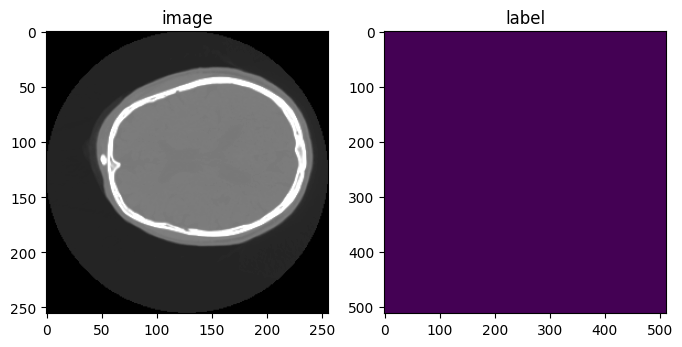

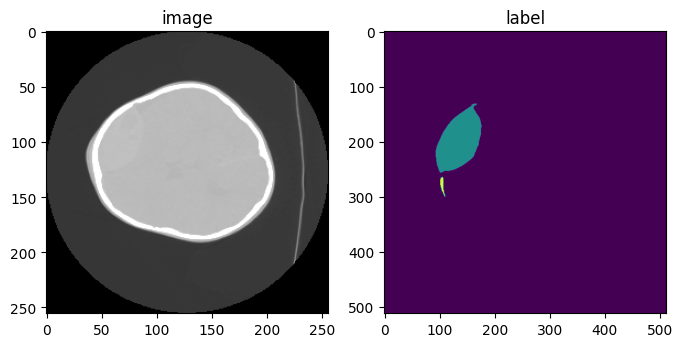

In [27]:
for file in val_files:
    data_dict = loader(file)
    image, label = data_dict["image"], data_dict["label"]
    plt.figure("visualize", (8, 4))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image[:, :, 70], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("label")
    plt.imshow(label[:, :, 70])
    plt.show()

In [28]:
#Cập nhật kích thước kênh theo giả định chuyển đổi của thư viện MONAI
ensure_channel_first = EnsureChannelFirstd(keys=["image", "label"])
for file in val_files:
    data_dict = loader(file)
    datac_dict = ensure_channel_first(data_dict)
    print(f"image shape: {datac_dict['image'].shape}")

image shape: torch.Size([1, 256, 256, 128])
image shape: torch.Size([1, 256, 256, 128])


image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 125])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -117.1233],
        [   0.0000,    0.0000,    1.2207,  -46.5000],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -117.6116],
        [   0.0000,    0.0000,    1.2500,  -46.5000],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


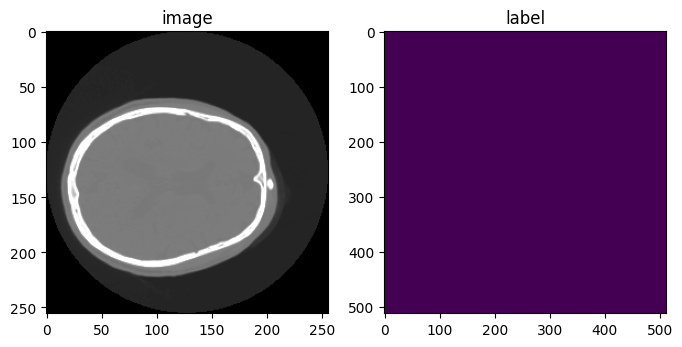

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -141.9233],
        [   0.0000,    0.0000,    1.2500,  -58.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -142.4116],
        [   0.0000,    0.0000,    1.2500,  -58.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


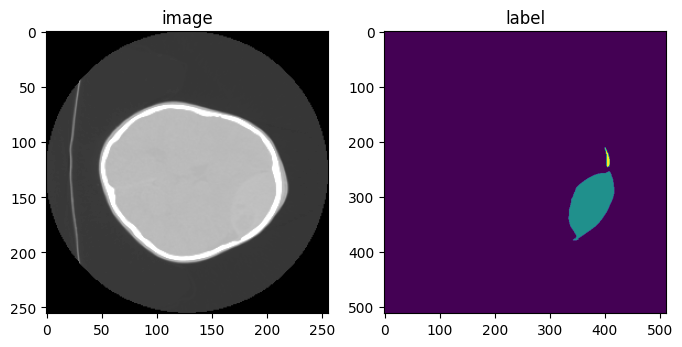

In [29]:
#Định hướng trục ban đầu
orientation = Orientationd(keys=["image", "label"], axcodes="RAS")

for file in val_files:
    data_dict = loader(file)
    datac_dict_channeld = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict_channeld)
    print(f"image shape: {data_dict_orient['image'].shape}")
    print(f"label shape: {data_dict_orient['label'].shape}")
    print(f"image affine after Orientation:\n{data_dict_orient['image'].meta['affine']}")
    print(f"label affine after Orientation:\n{data_dict_orient['label'].meta['affine']}")

    image, label = data_dict_orient["image"], data_dict_orient["label"]
    plt.figure("visualise", (8, 4))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image[0, :, :, 70], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("label")
    plt.imshow(label[0, :, :, 70])
    plt.show()

In [30]:
#Voxel check
for file in val_files:
    data_dict = loader(file)
    datac_dict = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict)
    print(f'[sample {file}]')
    print(f"image shape: {data_dict_orient['image'].shape}")
    print(f"label unique: {torch.unique(data_dict_orient['label'])}")
    print(f"image pixdim: {data_dict_orient['image'].pixdim}")
    print(f"label pixdim: {data_dict_orient['label'].pixdim}")

[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidData\\2400104001.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel\\2400104001-label.nii.gz'}]
image shape: torch.Size([1, 256, 256, 128])
label unique: tensor([0., 1.])
image pixdim: tensor([0.9766, 0.9766, 1.2207], dtype=torch.float64)
label pixdim: tensor([0.4883, 0.4883, 1.2500], dtype=torch.float64)
[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidData\\2400106729.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel\\2400106729-label.nii.gz'}]
image shape: torch.Size([1, 256, 256, 128])
label unique: tensor([0., 1., 2.])
image pixdim: tensor([0.

In [31]:
#Voxel optimize to (1,1,1) milimet
spacing = Spacingd(keys=["image", "label"], pixdim=(1., 1., 1.), mode=("bilinear", "nearest"))

for file in val_files:
    data_dict = loader(file)
    datac_dict = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict)
    DataD_voxelOpti = spacing(data_dict_orient)
    print(f'[sample {file}]')
    print(f"image shape: {DataD_voxelOpti['image'].shape}")
    print(f"label unique: {torch.unique(DataD_voxelOpti['label'])}")
    print(f"image pixdim: {DataD_voxelOpti['image'].pixdim}")
    print(f"label pixdim: {DataD_voxelOpti['label'].pixdim}")

[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidData\\2400104001.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel\\2400104001-label.nii.gz'}]
image shape: torch.Size([1, 250, 250, 156])
label unique: tensor([0., 1.])
image pixdim: tensor([1., 1., 1.], dtype=torch.float64)
label pixdim: tensor([1., 1., 1.], dtype=torch.float64)
[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidData\\2400106729.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel\\2400106729-label.nii.gz'}]
image shape: torch.Size([1, 250, 250, 160])
label unique: tensor([0., 1., 2.])
image pixdim: tensor([1., 1., 1.], dtype=torch.f

AFFINE - VALID SET

image shape: torch.Size([1, 250, 250, 156])
image affine:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -141.9233],
        [   0.0000,    0.0000,    1.2500,  -58.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 156])
label affine:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -142.4116],
        [   0.0000,    0.0000,    1.2500,  -58.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


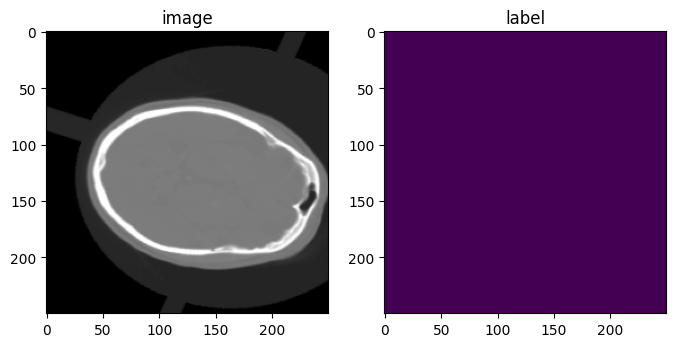

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[ 1.0024e+00, -3.1842e-01, -2.4703e-02, -7.4956e+01],
        [ 3.7767e-01,  8.4650e-01,  1.6988e-02, -1.8105e+02],
        [ 2.0337e-02, -2.4660e-02,  9.0214e-01, -3.7918e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[ 1.0024e+00, -3.1842e-01, -2.4703e-02, -7.5286e+01],
        [ 3.7767e-01,  8.4650e-01,  1.6988e-02, -1.8165e+02],
        [ 2.0337e-02, -2.4660e-02,  9.0214e-01, -3.7916e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)


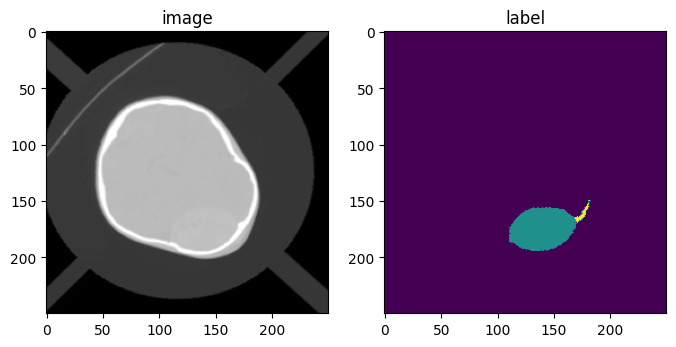

In [32]:
rand_affine = RandAffined(
    keys=["image", "label"],
    mode=("bilinear", "nearest"),
    prob=1.0,
    translate_range=(40, 40, 2),
    rotate_range=(np.pi / 36, np.pi / 36, np.pi / 4),
    scale_range=(0.15, 0.15, 0.15),
    padding_mode="border",
)
rand_affine.set_random_state(seed=123)


for file in val_files:
    data_dict = loader(file)
    datac_dict = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict)
    DataD_voxelOpti = spacing(data_dict_orient)
    
    # Áp dụng chuẩn hóa và phép biến đổi làm chuyển đổi affine
    affined = rand_affine(DataD_voxelOpti)

    print(f"image shape: {affined['image'].shape}")
    print(f"image affine:\n{image.meta['affine']}")

    print(f"label shape: {affined['label'].shape}")
    print(f"label affine:\n{label.meta['affine']}")


    image, label = affined["image"], affined["label"]
    plt.figure("visualise", (8, 4))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image[0, :, :, 70], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("label")
    plt.imshow(label[0, :, :, 70])
    plt.show()

    tensorof_Affinedimg = image.numpy()
    tensorof_Affinedlbl = label.numpy()

    Affinedimg = tensorof_Affinedimg.squeeze(0)
    Affinedlbl = tensorof_Affinedlbl.squeeze(0)

    # Tạo đối tượng NIfTI từ NumPy array
    nifti_image_affined = nib.Nifti1Image(Affinedimg, affine=None)  # Bạn cần cung cấp affine nếu có
    nifti_label_affined = nib.Nifti1Image(Affinedlbl, affine=None)  # Bạn cần cung cấp affine nếu có


    # Lưu đối tượng NIfTI thành một tệp
    basename = os.path.basename(file['image'])
    basename_label = os.path.basename(file['label'])

    out_filename = add_suffix_to_filename(basename, suffix='affine')
    out_filelabelname = add_suffix_to_filename(basename_label, suffix='affine')

    nib.save(nifti_image_affined, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Geometric/ValidSet/Image/{out_filename}')
    nib.save(nifti_label_affined, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Geometric/ValidSet/Label/{out_filelabelname}')

    # break

ELASTIC DEFORMED - VALID SET

image shape: torch.Size([1, 250, 250, 156])
image affine:
tensor([[ 7.9374e-01, -7.1224e-01, -3.0011e-03, -1.4539e+01],
        [ 7.5791e-01,  7.4452e-01,  4.4128e-02, -2.0045e+02],
        [-3.0678e-02, -3.4558e-02,  1.0126e+00, -5.3364e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 156])
label affine:
tensor([[ 7.9374e-01, -7.1224e-01, -3.0011e-03, -1.4568e+01],
        [ 7.5791e-01,  7.4452e-01,  4.4128e-02, -2.0119e+02],
        [-3.0678e-02, -3.4558e-02,  1.0126e+00, -5.3331e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)


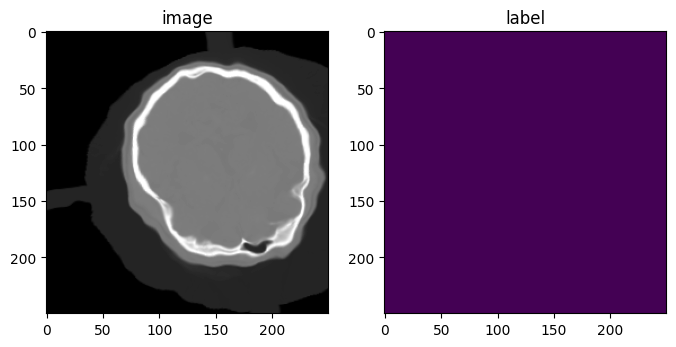

image shape: torch.Size([1, 250, 250, 160])
image affine:
tensor([[   1.0000,    0.0000,    0.0000, -124.0233],
        [   0.0000,    1.0000,    0.0000, -117.1233],
        [   0.0000,    0.0000,    1.0000,  -46.5000],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label shape: torch.Size([1, 250, 250, 160])
label affine:
tensor([[   1.0000,    0.0000,    0.0000, -124.5116],
        [   0.0000,    1.0000,    0.0000, -117.6116],
        [   0.0000,    0.0000,    1.0000,  -46.5000],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


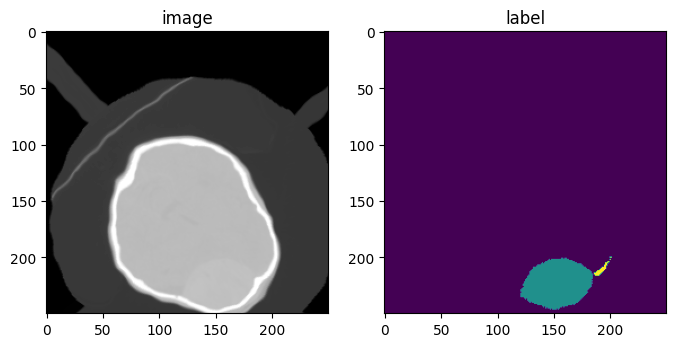

In [33]:
rand_elastic = Rand3DElasticd(
    keys=["image", "label"],
    mode=("bilinear", "nearest"),
    prob=1.0,
    sigma_range=(5, 8),
    magnitude_range=(100, 200),
    translate_range=(50, 50, 2),
    rotate_range=(np.pi / 36, np.pi / 36, np.pi),
    scale_range=(0.15, 0.15, 0.15),
    padding_mode="border",
)
rand_elastic.set_random_state(seed=123)

# Lặp qua từng ảnh trong tập dữ liệu
for file in val_files:
    data_dict = loader(file)
    datac_dict = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict)
    DataD_voxelOpti = spacing(data_dict_orient)
    
    # Áp dụng chuẩn hóa và phép biến đổi làm chuyển đổi elastic
    deformed = rand_elastic(DataD_voxelOpti)

    print(f"image shape: {deformed['image'].shape}")
    print(f"image affine:\n{image.meta['affine']}")

    print(f"label shape: {deformed['label'].shape}")
    print(f"label affine:\n{label.meta['affine']}")


    image, label = deformed["image"], deformed["label"]
    plt.figure("visualise", (8, 4))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image[0, :, :, 70], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("label")
    plt.imshow(label[0, :, :, 70])
    plt.show()

    tensorof_Deformedimg = image.numpy()
    tensorof_Deformedlbl = label.numpy()

    Deformedimg = tensorof_Deformedimg.squeeze(0)
    Deformedlbl = tensorof_Deformedlbl.squeeze(0)

    # Tạo đối tượng NIfTI từ NumPy array
    nifti_image_deformed = nib.Nifti1Image(Deformedimg, affine=None)  # Bạn cần cung cấp affine nếu có
    nifti_label_deformed = nib.Nifti1Image(Deformedlbl, affine=None)  # Bạn cần cung cấp affine nếu có


    # Lưu đối tượng NIfTI thành một tệp
    basename = os.path.basename(file['image'])
    basename_label = os.path.basename(file['label'])

    out_filename = add_suffix_to_filename(basename, suffix='deformed')
    out_filelabelname = add_suffix_to_filename(basename_label, suffix='deformed')

    nib.save(nifti_image_deformed, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Geometric/ValidSet/Image/{out_filename}')
    nib.save(nifti_label_deformed, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Geometric/ValidSet/Label/{out_filelabelname}')

    # break

TORCHIO - TIO - FLIP FOR VALID SET

image shape: torch.Size([1, 250, 250, 156])
label shape: torch.Size([1, 251, 251, 156])


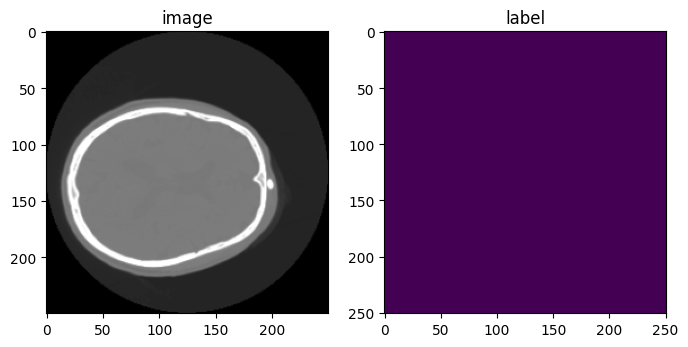

image shape: torch.Size([1, 250, 250, 160])
label shape: torch.Size([1, 251, 251, 160])


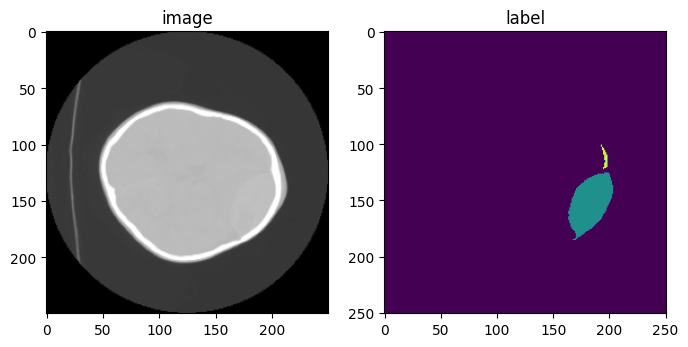

In [34]:
random_flip = tio.RandomFlip(keys=["image", "label"], axes=['inferior-superior'], flip_probability=1)
# Lặp qua từng ảnh trong tập dữ liệu
for file in val_files:
    data_dict = loader(file)
    datac_dict_channeld = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict_channeld)
    DataD_voxelOpti = spacing(data_dict_orient)   
    flipped = random_flip(DataD_voxelOpti)

    print(f"image shape: {flipped['image'].shape}")
    print(f"label shape: {flipped['label'].shape}")

    image, label = flipped["image"], flipped["label"]
    plt.figure("visualise", (8, 4))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image[0, :, :, 70], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("label")
    plt.imshow(label[0, :, :, 70])
    plt.show()

    tensorof_Flippedimg = image.numpy()
    tensorof_Flippedlbl = label.numpy()

    Flippedimg = tensorof_Flippedimg.squeeze(0)
    Flippedlbl = tensorof_Flippedlbl.squeeze(0)

    # Tạo đối tượng NIfTI từ NumPy array
    nifti_image_flipped = nib.Nifti1Image(Flippedimg, affine=None)  # Bạn cần cung cấp affine nếu có
    nifti_label_flipped = nib.Nifti1Image(Flippedlbl, affine=None)  # Bạn cần cung cấp affine nếu có


    # Lưu đối tượng NIfTI thành một tệp
    basename = os.path.basename(file['image'])
    basename_label = os.path.basename(file['label'])

    out_filename = add_suffix_to_filename(basename, suffix='flip')
    out_filelabelname = add_suffix_to_filename(basename_label, suffix='flip')

    nib.save(nifti_image_flipped, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Geometric/ValidSet/Image/{out_filename}')
    nib.save(nifti_label_flipped, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Geometric/ValidSet/Label/{out_filelabelname}')


_______________________________________________________________________________________
_______________________________________________________________________________________

In [145]:
# TrainSet - Image 
import os
filepath = './FinalizeData/TrainData/registered_ID_0b10cbee_ID_f91d6a7cd2_final.nii.gz'

basename = os.path.basename(filepath)
print(basename)

registered_ID_0b10cbee_ID_f91d6a7cd2_final.nii.gz


In [118]:
# TrainSet - Label
import os
filepath = './FinalizeData/TrainLabel/_groundtruth_registered_ID_0b10cbee_ID_f91d6a7cd2.nii.gz'

basename_label = os.path.basename(filepath)
print(basename_label)

_groundtruth_registered_ID_0b10cbee_ID_f91d6a7cd2.nii.gz


torch.Size([251, 251, 164])


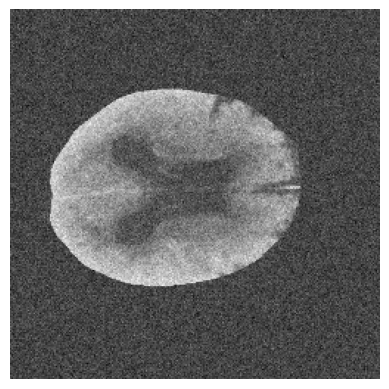

In [123]:
# import torch
# import matplotlib.pyplot as plt
# import numpy as np

# # Giả sử img là tensor có kích thước [1, 251, 251, 164]
# # img = torch.randn(1, 251, 251, 164) # Thay thế dòng này bằng dữ liệu thực tế của bạn

# # Xóa kích thước batch bằng cách sử dụng squeeze
# img = noisy.squeeze(0)
# print(img.shape)
# # Lấy dữ liệu từ tensor
# img_data = img.cpu().detach().numpy()  # Chuyển về NumPy array

# # Lấy slice trung tâm của ảnh để hiển thị
# center_slice = img_data[:, :, img_data.shape[2] // 2]

# # Hiển thị slice trung tâm của ảnh
# plt.imshow(center_slice, cmap='gray')
# plt.axis('off')
# plt.show()


In [146]:
import ants
# Giả sử meta_tensor là đối tượng MetaTensor bạn muốn lưu
# Và output_file là đường dẫn của tệp bạn muốn tạo ra
meta_tensor = affined_data_dict["image"][0]

# Chuyển đổi MetaTensor thành tensor torch
tensor = meta_tensor.numpy()
# tensor.shape
# Xóa kích thước batch bằng cách sử dụng squeeze
# imgAugment = tensor.squeeze(0)

# Chuyển đổi tensor thành NumPy array
# numpy_array = tensor.numpy()

# Tạo đối tượng NIfTI từ NumPy array
nifti_image = nib.Nifti1Image(imgAugment, affine=None)  # Bạn cần cung cấp affine nếu có

# Lưu đối tượng NIfTI thành một tệp
nib.save(nifti_image, f'../FinalizeData/Augmented/TrainSet/Image/{basename}')
# ants.image_write(image, f'../FinalizeData/Augmented/TrainSet/{basename}')

In [60]:
import ants
meta_tensor = deformed_data_dict["label"][0]

# Chuyển đổi MetaTensor thành tensor torch
tensor = meta_tensor.numpy()

# Tạo đối tượng NIfTI từ NumPy array
nifti_image = nib.Nifti1Image(tensor, affine=None)  # Bạn cần cung cấp affine nếu có

# Lưu đối tượng NIfTI thành một tệp
nib.save(nifti_image, f'../FinalizeData/Augmented/TrainSet/Label/{basename_label}')

In [ ]:
# saver = SaveImage(
#     output_dir=tempdir,
#     output_ext=".nii.gz",
#     output_dtype=np.uint8,
#     resample=False,
#     squeeze_end_dims=True,
#     writer="NibabelWriter",
# )
# img = saver(img)